In [1]:
from joblib import load, dump
import numpy as np
import h5py
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances, distance_metrics
from matplotlib import pyplot as plt
import numba
from umda import MRS, EmbeddingModel

plt.style.use('publication')

Traceback (most recent call last):
  File "/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/rdkit/Chem/PandasTools.py", line 130, in <module>
    if 'display.width' in pd.core.config._registered_options:
AttributeError: module 'pandas.core' has no attribute 'config'


In [2]:
embedder = EmbeddingModel.from_pkl("../../models/mol2vec_model.pkl", "../../models/embedding_pipeline.pkl", radius=1)

In [3]:
embedder.save("../../models/EmbeddingModel.pkl")

2020-11-02 15:29:11.132 | INFO     | umda.classes:save:59 - Saved model to ../../models/EmbeddingModel.pkl.


In [4]:
gp_grid = load("../../models/gp_grid.pkl")

dump(gp_grid.best_estimator_, "../../models/best_gp_estimator.pkl")

['../../models/best_gp_estimator.pkl']

In [5]:
mrs_gp = MRS.from_pickle("../../models/kmeans_model.pkl", "../../models/best_gp_estimator.pkl")

mrs_gp.save("../../models/TMC1_MRS_GP.pkl")

2020-11-02 15:29:11.170 | INFO     | umda.classes:save:220 - Saved MRS to ../../models/TMC1_MRS_GP.pkl


In [6]:
data = h5py.File("../../data/processed/smiles_embeddings_300.h5", "r")

In [7]:
pipeline = load("../../models/embedding_pipeline.pkl")

In [8]:
tmc1_df = pd.read_pickle("../../data/interim/tmc1_table_vecs.pkl")

In [9]:
tmc1_vecs = np.vstack(tmc1_df["Vecs"])
tmc1_embedding = pipeline[0].transform(tmc1_vecs)

### GP recommendations without clustering 

In [10]:
gp_nocluster_df = mrs_gp.recommend(X=tmc1_embedding, cluster=False, h5_data=data)

2020-11-02 14:11:39.534 | INFO     | umda.classes:recommend:186 - There are 1442131 molecules in this aggregate.


In [11]:
gp_nocluster_df.sort_values(["Abundance"], ascending=False).head(30)

,Abundance,Uncertainty,Index,SMILES,Counts
0,14.452308,0.600580,0,C,2
227,14.452308,1.364869,469,OC1C(O)C1O,3
235,14.452308,0.942585,15,C1CC1,2
234,14.452308,0.867004,16,C1CO1,1
233,14.452308,0.934125,98,OC1COC1,1
232,14.452308,0.858706,303,CN1CC(=O)C1,2
231,14.452308,1.201648,463,OC1CCCC1,3
230,14.452308,1.033731,464,OC1CCOC1,1
229,14.452308,1.144552,14119,CC1(C=O)C2CCC21,2
228,14.452308,1.109611,466,CC1C(C)C1O,1


In [12]:
gp_cluster_df = mrs_gp.recommend(X=tmc1_embedding, cluster=True, h5_data=data)

2020-11-02 14:11:52.326 | INFO     | umda.classes:recommend:177 - Using the following clusters: [12]
2020-11-02 14:11:53.725 | INFO     | umda.classes:recommend:186 - There are 76086 molecules in this aggregate.


In [36]:
gp_cluster_df.sort_values(["Abundance"], ascending=False).head(20)

,Abundance,Uncertainty,Index,SMILES,Counts
0,14.452308,0.600580,0,C,2
224,14.452308,0.743066,327,C#CC(O)C#N,1
232,14.452308,0.623995,3,C#C,1
231,14.452308,0.701840,13,CCO,3
230,14.452308,0.722226,14,COC,2
229,14.452308,0.942585,15,C1CC1,1
228,14.452308,0.774305,76,COC(C)=O,1
227,14.452308,0.820509,234,CC(=N)OC=O,2
226,14.452308,0.758095,324,C#CC(N)C#N,3
225,14.452308,0.783138,325,N#CC(N)C#N,1


In [26]:
comp = gp_cluster_df.sort_values(["Abundance"], ascending=False).head(15)["SMILES"].to_list()

In [27]:
comp

['C',
 'C#CC(O)C#N',
 'C#C',
 'CCO',
 'COC',
 'C1CC1',
 'COC(C)=O',
 'CC(=N)OC=O',
 'C#CC(N)C#N',
 'N#CC(N)C#N',
 'C#CC(C)C=O',
 'CCCC#CC(C)O',
 'CC(C#N)C=O',
 'C#CC(=O)CO',
 'N#CC(=O)CO']

## Using gradient boosting for recommendations

In [10]:
boost_grid = load("../../models/gradient_boosting_grid.pkl")

dump(boost_grid.best_estimator_, "../../models/best_gbr_estimator.pkl")

['../../models/best_gbr_estimator.pkl']

In [11]:
mrs_gbr = MRS.from_pickle("../../models/kmeans_model.pkl", "../../models/best_gbr_estimator.pkl")

mrs_gbr.save("../../models/TMC1_MRS_GBR.pkl")

2020-11-02 15:29:15.058 | INFO     | umda.classes:save:220 - Saved MRS to ../../models/TMC1_MRS_GBR.pkl


In [16]:
gbr_nocluster_df = mrs_gbr.recommend(X=tmc1_embedding, cluster=False, h5_data=data)

2020-11-02 14:12:04.869 | INFO     | umda.classes:recommend:186 - There are 1442131 molecules in this aggregate.


In [18]:
gbr_cluster_df = mrs_gbr.recommend(X=tmc1_embedding, cluster=True, h5_data=data, dist_thres=1e-4)

2020-11-02 14:12:17.584 | INFO     | umda.classes:recommend:177 - Using the following clusters: [12]
2020-11-02 14:12:19.020 | INFO     | umda.classes:recommend:186 - There are 76072 molecules in this aggregate.


In [42]:
gbr_cluster_df.head(20)

,Abundance,Index,SMILES,Counts
0,18.862867,0,C,2
1,15.546713,1,N,3
2,13.590779,76032,CC1C2C3C=CC(C3)C12,3
3,13.398361,18769,C1=CC2CCC1CO2,4
4,13.306271,76035,OC1C2C3C=CC(C3)C12,1
5,13.287065,3,C#C,1
6,12.976464,17356,OCCC1C2CC1C2,2
7,12.908845,76034,CN1C2C3C=CC(O3)C21,1
8,12.849395,76006,OC1C2C3C=CCN3C12,1
9,12.816114,51499,CC(=O)C#CCC1CC1,2


In [28]:
comp

['C',
 'C#CC(O)C#N',
 'C#C',
 'CCO',
 'COC',
 'C1CC1',
 'COC(C)=O',
 'CC(=N)OC=O',
 'C#CC(N)C#N',
 'N#CC(N)C#N',
 'C#CC(C)C=O',
 'CCCC#CC(C)O',
 'CC(C#N)C=O',
 'C#CC(=O)CO',
 'N#CC(=O)CO']

In [91]:
from subprocess import Popen, PIPE
import matplotlib.image as image
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [92]:
def add_image(axis, filepath, zoom=0.15, position=[0.0, 0.0]):
    """
        Function to add an image annotation to a specified axis.
        Takes the matplotlib axis and filepath to the image as input,
        and optional arguments for the scaling (zoom) and position of
        the image in axis units.
    """
    image = OffsetImage(plt.imread(filepath, format="png"), zoom=zoom)
    image.image.axes = axis

    box = AnnotationBbox(
        image, position, xybox=position, xycoords="data", frameon=False
    )
    axis.add_artist(box)


In [98]:
for index, smi in enumerate(comp):
    cmd = f"""obabel -:"{smi}" -opng"""
    with open(f"molecules/{index}.png", "w+") as write_file:
        proc = Popen(cmd, stdout=write_file, shell=True)

In [101]:
selected = gbr_cluster_df.loc[gbr_cluster_df["SMILES"].isin(comp[:10])]
gp_selected = gp_cluster_df.loc[gp_cluster_df["SMILES"].isin(comp[:10])]

selected.reset_index(inplace=True, drop=True)

(0.0, 25.0)

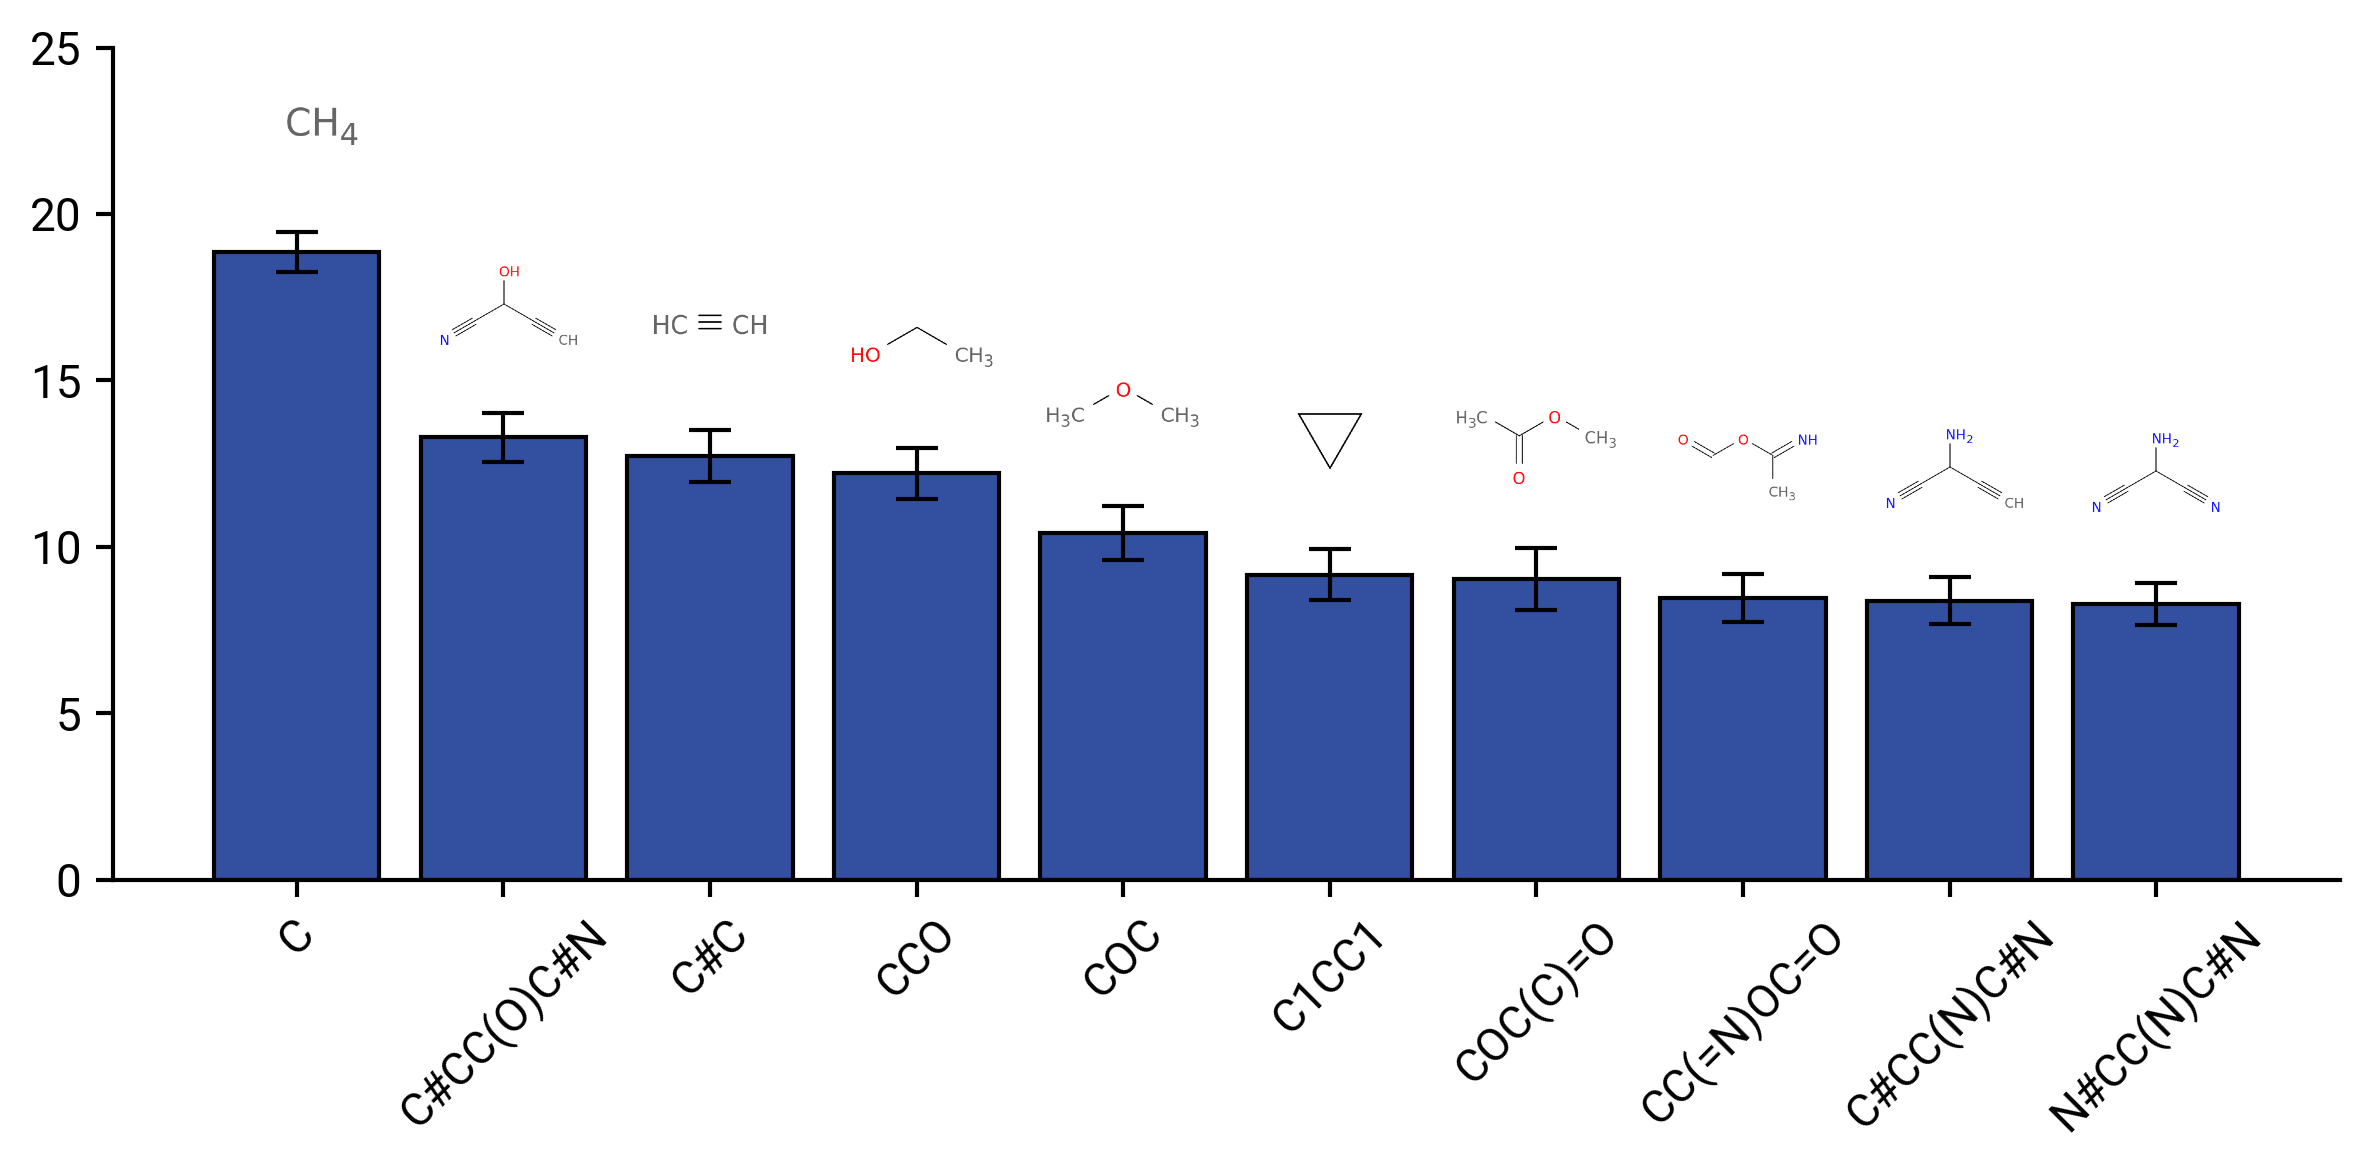

In [109]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(np.arange(len(selected)), selected["Abundance"], yerr=gp_selected["Uncertainty"], capsize=5, linewidth=1., edgecolor="k")
ax.set_xticks(np.arange(len(selected)))
ax.set_xticklabels(comp, rotation=45)
for index, row in selected.iterrows():
    add_image(ax, f"molecules/{index}.png", zoom=0.15, position=[index, row["Abundance"] + 4.])
ax.set_ylim([0., 25.])

## Requests

In [12]:
targets = [
    "C1=CNC=C1",   # pyrrole
    "C1=CC=NC=C1", # pyridine
    "C1=CC=C(C(=C1)C#N)C#N", # ortho-DCB
    "C(C(=O)O)N", # glycine
    "C1C=CC2=CC=CC=C21", # indene
    "C1=CC=CC=C1", # benzene
    "C1=CC=C(C=C1)O", # phenol
    "C1=CC=C2C=C3C=CC=CC3=CC2=C1", # anthracene
    "C1=CC=C2C=CC=CC2=C1", # naphthalene
]

In [15]:
target_df = mrs_gbr.predict(smi=targets, embedding_model=embedder)

In [16]:
target_df["Name"] = ["Pyrrole", "Pyridine", "ortho-DCB", "Glycine", "Indene", "Benzene", "Phenol", "Anthracene", "Naphthalene"]

In [17]:
target_df

,Abundance,SMILES,Name
0,10.614803,C1=CNC=C1,Pyrrole
1,12.131378,C1=CC=NC=C1,Pyridine
2,5.200183,C1=CC=C(C(=C1)C#N)C#N,ortho-DCB
3,11.273654,C(C(=O)O)N,Glycine
4,9.472577,C1C=CC2=CC=CC=C21,Indene
5,13.060663,C1=CC=CC=C1,Benzene
6,11.121467,C1=CC=C(C=C1)O,Phenol
7,7.128609,C1=CC=C2C=C3C=CC=CC3=CC2=C1,Anthracene
8,8.126541,C1=CC=C2C=CC=CC2=C1,Naphthalene


In [18]:
indene = np.sum([1345768928638.639, 2727913957371.784, 1753385269270.761, 3079442410060.451])

In [19]:
print(f"{indene:.4e}")

8.9065e+12


In [23]:
tmc1_predict = mrs_gbr.predict(X=tmc1_embedding, smi=tmc1_df["SMILES"].to_list())

In [37]:
tmc1_predict["Observed"] = np.log10(tmc1_df["Column density (cm^-2)"].values)

In [45]:
tmc1_predict.iloc[60:73]

,Abundance,SMILES,Observed
60,11.922915,C#CC#C[C+]=O,12.230449
61,11.998348,C=[N],11.176091
62,12.404672,C=O,13.079181
63,11.841391,C#CC#[O+],11.322219
64,12.153225,O=C=[OH+],11.602060
65,11.672592,C=[OH+],11.477121
66,11.134055,NC#[O+],10.602060
67,11.736825,C#N[O],10.845098
68,11.800793,OC#N,11.041393
69,21.086520,[HH],22.000000


In [38]:
tmc1_predict.sample(20, replace=False)

,Abundance,SMILES,Observed
25,12.072381,[C-]#C-C#[NH+],11.680336
32,11.948157,[CH+]=C=C=C=[C-],12.269513
54,11.464689,C#CC#CC#[C-],11.079181
79,11.555845,N#CC#[NH+],10.934498
64,12.153225,O=C=[OH+],11.602060
66,11.134055,NC#[O+],10.602060
72,11.856454,C#[C]=O,12.000000
35,13.654488,C#CC#N,14.243038
41,12.841522,C#CC#CC#CC#CC#N,13.334454
15,12.363570,CC#N,12.609594


In [39]:
np.mean(np.square(tmc1_predict["Abundance"] - tmc1_predict["Observed"]))

0.23392453907752672